<a href="https://colab.research.google.com/github/viriditass/Miscellaneous/blob/main/LRN(Local_Response_Normalization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Local Response Normalization**

**ReLU를 Saturated 부분이 없지만 그 값이 무한히 커질 가능성이 있어 너무 큰 값이 주변 값들을 무시할 수도 있다**. 이러한 현상은 생물학적 뉴런에서 강한 자극이 주변 약한 자극이 전달되는 것을 막는 현상과 유사하고, 이를 Lateral inhibitation 이라고 한다. 그래서 AlexNet에서는 ReLU 결과 값을 Normalization 하여 일반화 된 모델을 만들기 위해 **LRN**을 사용했다.

참고로 현재는 Batch Normalization을 사용한다.

## **1. What is LRN**

local response normalization (LRN): 신경생물학에는 **lateral inhibition**이라고 불리는 개념이 있다. **활성화된 뉴런이 주변 이웃 뉴런들을 억누르는 현상을 의미**한다. lateral inhibition 현상을 모델링한 것이 바로 local response normalization이다. 강하게 활성화된 뉴런의 주변 이웃들에 대해서 normalization을 실행한다. 주변에 비해 어떤 뉴런이 비교적 강하게 활성화되어 있다면, 그 뉴런의 반응은 더욱더 돋보이게 될 것이다. 반면 강하게 활성화된 뉴런 주변도 모두 강하게 활성화되어 있다면, local response normalization 이후에는 모두 값이 작아질 것이다.

## **2. Hermann Grid**

아래 이미지는 1870년 Ludimar Hermann이 발견한 착시 현상인 헤르만 격자(hermann-grid)이다.

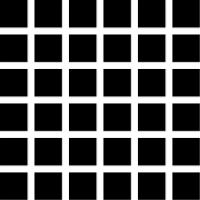

흰색 선에 집중하지 않을 때 회색점이 보이는데 이러한 현상이 바로 **측면 억제(lateral inhibition)**에 의해 발생하는 것이다.

## **3. Mathematical Notation & Code**

### **Math**

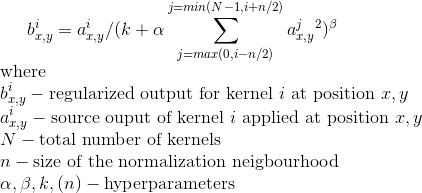

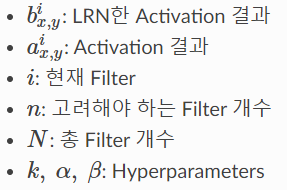

예를 들어 n=5, i=5라고 가정을 하면 여기서 n은 현재 i번째 Filter 결과값을 기준으로 Normalization 할 Filter의 개수이다. 따라서 Filter 5를 기준으로 앞뒤로 2개씩 고려하면 Filter 3, 4, 5, 6, 7 값을 고려하여 Normalization 한 값을 Filter 5의 값으로 사용하게 된다. 이렇게 하면 원래 Filter 5의 결과값이 엄청 크다고 해도 주변 값들을 고려해서 그 값을 조금 더 줄여주는 효과가 생긴다. 그 결과 Lateral inhibitation 효과를 줄일 수 있게 된다.

### **Pytorch**

In [ ]:
import torch.nn as nn

torch.nn.LocalResponseNorm(size: int, alpha: float = 0.0001, beta: float = 0.75, k: float = 1.0)

**Parameters**
- size – amount of neighbouring channels used for normalization
- alpha – multiplicative factor. Default: 0.0001
- beta – exponent. Default: 0.75
- k – additive factor. Default: 1

**Shape**:
- Input: (N, C, *)(N,C,∗)
- Output: (N, C, *)(N,C,∗) (same shape as input)